In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
class Node:
    def __init__(self,lon,lat,id,neighbors,name):
        self.lon = lon
        self.lat = lat
        self.id = id
        self.neighbors = neighbors
        self.name = name

In [3]:
filename = "google_transit/stop_times.txt"

f = open(filename, 'r')

full_list = []

for line in f:
    trip_id = line.split(',')[0].split('-')

    if 'Weekday' in trip_id:
        full_list.append(line)

full_list = full_list[1:]

full_list[1]

'AFA22GEN-1091-Weekday-00_000650_1..S03R,00:09:30,00:09:30,104S,3,,0,0,\n'

In [4]:
full_list[0].split(",")
stop_list = []
time_list = []
current_trip_id = ""

for i in range(len(full_list)):
    split_list = full_list[i].split(",")

    stop_name = split_list[3]
    stop_list.append(stop_name[0:3])

    stop_time = split_list[1]
    time_list.append(stop_time)

ustop_list = set(stop_list)
utime_list = set(time_list)

for i in range(len(full_list)):
    split_list = full_list[i].split(",")
    trip_id = split_list[0]

    #if trip_id == current_trip_id:



In [5]:
station_dict = {}
station_ids = []

for time in utime_list:
    for stop in ustop_list:
        station_ids.append(time+"-"+stop)

        h,m,s = time.split(':')
        s = int(h)*3600+int(m)*60+int(s)
        p = str(datetime.timedelta(seconds=s+30))

        if p[1] == ":":
            p = "0" + p

        if s >= 86300:
            fut_self = str(datetime.timedelta(seconds=s)) + "-" + stop
        else:
            fut_self = p + "-" + stop

        station_dict[time+"-"+stop] = [fut_self]

current_trip_id = "AFA22GEN-1037-Sunday-00_000600_1..S03R"

for i in range(len(full_list)-1):
#for i in range(50):
    split_list = full_list[i].split(",")
    fut_split_list = full_list[i+1].split(",")

    trip_id = split_list[0]
    stop_name = split_list[3][0:3]
    stop_time = split_list[1]

    station_id = stop_time + "-" + stop_name

    fut_trip_id = fut_split_list[0]
    fut_stop_name = fut_split_list[3][0:3]
    fut_stop_time = fut_split_list[1] 

    fut_station_id = fut_stop_time + "-" + fut_stop_name

    #print(trip_id)

    if trip_id != current_trip_id:
        current_trip_id = trip_id

    if trip_id == current_trip_id and fut_trip_id == current_trip_id:
        station_dict[station_id].append(fut_station_id)
        #print(fut_station_id)

    #fut_self = p + "-" + stop_name
    #station_dict[station_id].append(fut_self)

for key in station_dict:
    station_dict[key] = set(station_dict[key])

In [6]:
filename = "google_transit/stops.txt"

f = open(filename, 'r')

lonlat_dict = {}
name_dict = {}

lons = []
lats = []

counter = 0
for line in f:
    counter += 1

    if counter > 1:
        split_line = line.split(",")

        split_line = line.split(",")

        lonlat_dict[split_line[0][0:3]] = (float(split_line[4]), float(split_line[5]))
        name_dict[split_line[0][0:3]] = split_line[2]

        lons.append(float(split_line[4]))
        lats.append(float(split_line[5]))

In [7]:
node_dict = {}

for key in station_dict:
    lonlat = lonlat_dict[key[-3:]]
    temp_node = Node(lonlat[0],lonlat[1],key,
        list(station_dict[key]),name_dict[key[-3:]])
    node_dict[key] = temp_node

In [8]:
node_dict['13:59:00-R20'].lon

40.735736

In [9]:
station_dict["09:33:30-123"]

{'09:34:00-123',
 '09:35:00-124',
 '09:35:30-122',
 '09:36:30-120',
 '09:38:00-127'}

['00:30:30-H14']
['00:31:00-H14']
['00:31:30-H14']
['00:32:00-H14']
['00:32:30-H14']
['00:33:00-H14']
['00:33:30-H14']
['00:34:00-H14']
['00:34:30-H14']
['00:35:00-H14']
['00:35:30-H14']
['00:36:00-H14']
['00:36:30-H14']
['00:37:00-H14']
['00:37:30-H14']
['00:38:00-H14']
['00:38:30-H14']
['00:39:00-H14']
['00:39:30-H14']
['00:40:00-H14']
['00:40:30-H14']
['00:41:00-H14']
['00:41:30-H14']
['00:42:00-H14']
['00:42:30-H14']
['00:43:00-H14']
['00:45:00-H13', '00:43:30-H14']
['00:45:30-H13', '00:46:30-H12']
['00:50:00-H04', '00:47:00-H12']
['00:50:30-H04']
['00:51:00-H04']
['00:51:30-H04']
['00:52:00-H04']
['00:52:30-H04']
['00:53:00-H04']
['00:53:30-H04']
['00:54:00-H04']
['00:54:30-H04']
['00:55:00-H04']
['00:55:30-H04']
['00:56:00-H04']
['00:56:30-H04']
['00:57:00-H04']
['00:57:30-H04']
['00:58:00-H04']
['00:58:30-H04']
['00:59:00-H04']
['00:59:30-H04']
['01:00:00-H04']
['01:00:30-H04']
['01:01:00-H04']
['01:01:30-H04']
['01:02:00-H04']
['01:02:30-H04']
['01:03:00-H04']
['01:03:30-H04']


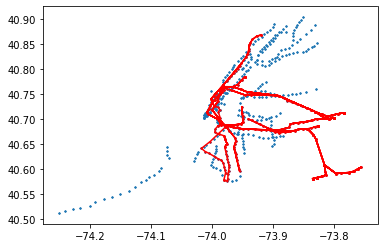

In [11]:
# starting station
s1 = "00:30:00-H14"

lon_path = []
lat_path = []
node_path = []
station_path = []

for i in range(700):
    # plot current station
    node1 = node_dict[s1]
    lat_path.append(node1.lat)
    lon_path.append(node1.lon)

    print(node1.neighbors)

    node_path.append(node1.id[-3:])
    if i>1:
        if node_path[i-1]!=node_path[i]:
            station_path.append(node_path[i])


    myname = s1[-3:]

    selc = 0
    if len(node1.neighbors) > 1:
        for c,n in enumerate(node1.neighbors):
            yourname = n[-3:]
            if yourname != myname:
                selc = c

            #print(node1.neighbors)

    #selc = np.random.randint(len(node1.neighbors))

    s1 = node1.neighbors[selc]

    #print(node1.neighbors)

fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

plt.scatter(lats,lons,s=1)
plt.plot(lat_path, lon_path,'rs-', markersize=1)
# ax.view_init(45,270)
# plt.show()

print(len(set(station_path)))


In [12]:
node_dict['00:55:00-H15'].neighbors

['00:55:30-H15']

In [13]:
class PathFinder:
    def __init__(self) -> None:
        self.paths = []

    def visit_node(self,station,node_dict,path,depth,maxdepth):
        depth += 1

        if depth==maxdepth:
            #path.append('CUT')
            self.paths.append(path.copy())
            #path.pop()

        if depth<maxdepth:
            current_node = node_dict[station]
            print("add " + station)
            path.append((station,depth))

            # if len(current_node.neighbors)>1:
            #     self.saved_path = path

            for neighbor in current_node.neighbors:
                self.visit_node(neighbor,node_dict,path,depth,maxdepth)
                print(path)
                print(neighbor)
                print("pop")
                path.pop()
        return

    def rate_nodes(self,num_best):
        
        #print(len(self.paths))
        scores = []
        max_score = 0
        for path in self.paths:
            ids = set([station[0][-3:] for station in path])
            score = len(ids)
            if score > max_score:
                max_score = score
                best_path = path        
        #scores.sort()
        return best_path, max_score

finder = PathFinder()

s1 = "08:30:00-E01"
finder.visit_node(s1, node_dict, [], 0, 10)

best_path, score = finder.rate_nodes(100)

print(len(finder.paths))

add 08:30:00-E01
add 08:30:30-E01
add 08:31:00-E01
add 08:31:30-E01
add 08:32:00-E01
add 08:32:30-E01
add 08:33:00-E01
add 08:33:30-E01
add 08:34:00-E01
[('08:30:00-E01', 1), ('08:30:30-E01', 2), ('08:31:00-E01', 3), ('08:31:30-E01', 4), ('08:32:00-E01', 5), ('08:32:30-E01', 6), ('08:33:00-E01', 7), ('08:33:30-E01', 8), ('08:34:00-E01', 9)]
08:34:30-E01
pop
[('08:30:00-E01', 1), ('08:30:30-E01', 2), ('08:31:00-E01', 3), ('08:31:30-E01', 4), ('08:32:00-E01', 5), ('08:32:30-E01', 6), ('08:33:00-E01', 7), ('08:33:30-E01', 8)]
08:34:00-E01
pop
[('08:30:00-E01', 1), ('08:30:30-E01', 2), ('08:31:00-E01', 3), ('08:31:30-E01', 4), ('08:32:00-E01', 5), ('08:32:30-E01', 6), ('08:33:00-E01', 7)]
08:33:30-E01
pop
[('08:30:00-E01', 1), ('08:30:30-E01', 2), ('08:31:00-E01', 3), ('08:31:30-E01', 4), ('08:32:00-E01', 5), ('08:32:30-E01', 6)]
08:33:00-E01
pop
add 08:34:30-A34
add 08:35:00-A34
add 08:35:30-A34
[('08:30:00-E01', 1), ('08:30:30-E01', 2), ('08:31:00-E01', 3), ('08:31:30-E01', 4), ('08:32:0

IndexError: pop from empty list

In [86]:
print(node_dict['08:36:00-A33'].neighbors)

print(node_dict['08:37:30-A34'].neighbors)

['08:36:30-A33', '08:38:00-A32', '08:37:30-A34']
['08:39:30-E01', '08:38:00-A34']


In [79]:
node_dict['08:36:00-A33'].neighbors

['08:36:30-A33', '08:38:00-A32', '08:37:30-A34']